In [2]:
import sys
sys.path.append('..')
import generate_potential_2d_spiral as gp2Sp
import generate_potential_2d_Zshape as gp2Zs
import generate_trajectory_Langevin_2D_from_symbolic as gt2La

In [3]:
dir(gp2Sp)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'cm',
 'generate_potential_2d_spirals_numeric',
 'generate_potential_2d_spirals_symbolic',
 'np',
 'plt',
 'spy',
 'stats',
 'tqdm']

In [21]:
potential_Spiral_symbolic, dx, dy = gp2Sp.generate_potential_2d_spirals_symbolic([100,100],2,False,True)

In [22]:
dx

-0.1*x_symb*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2) - 1.02040816326531*(-0.2*x_symb*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) - 2*(0.04*x_symb + 2*y_symb/(x_symb**2 + y_symb**2))*(0.05*x_symb**2 + 0.05*y_symb**2)*cos(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)))*(-0.05*x_symb**2 - 0.05*y_symb**2 - 1)*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**3

In [23]:
dy

-0.1*y_symb*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2) - 1.02040816326531*(-0.2*y_symb*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) - 2*(0.05*x_symb**2 + 0.05*y_symb**2)*(-2*x_symb/(x_symb**2 + y_symb**2) + 0.04*y_symb)*cos(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)))*(-0.05*x_symb**2 - 0.05*y_symb**2 - 1)*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**3

In [5]:
potential_Spiral_symbolic

-(0.05*x_symb**2 + 0.05*y_symb**2 + 1)*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)

In [6]:
dir(gt2La)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'cm',
 'generate_potential_2d_Zshape_numeric',
 'generate_potential_2d_spirals_numeric',
 'generate_potential_2d_spirals_symbolic',
 'generate_trajectory_Langevin_from_symbolic_2D',
 'np',
 'plt',
 'spy',
 'stats',
 'time',
 'tqdm']

In [7]:
traj_test = gt2La.generate_trajectory_Langevin_from_symbolic_2D(potential_Spiral_symbolic, [0.1,0.1], 10, 0.25, 5000)

  0%|          | 0/4999 [00:00<?, ?it/s]

{y_symb, x_symb}
{y_symb, x_symb}
part1: 0.00043702125549316406
part2: 0.0006792545318603516
part3: 0.0001289844512939453


100%|██████████| 4999/4999 [07:58<00:00, 10.44it/s]

part4: 478.94054102897644


In [9]:
#from generate_trajectory_Langevin_2D_from_symbolic import *
from generate_potential_2d_spiral import *
from generate_potential_2d_Zshape import *
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import sympy as spy
import time

def generate_trajectory_Langevin_from_symbolic_2D(potential_symbolic,position_initial, friction,simul_lagtime,n_steps):
    KbT = 0.5981 * (10 ** 5)

    # Temp vars is not required since symbolic math would include them directly
    # But it would be good to take a log as debugging propose 
    t1 = time.time()
    temp_vars = potential_symbolic.free_symbols
    print(temp_vars)
    n_dim = len(temp_vars)
    x_symb, y_symb = list(temp_vars) 
    print(temp_vars)
    t2 = time.time()
    print('part1:', t2-t1)
    # Symbolic derivatives with respect to x and y
    # x_symb and y_symb is includeded in the potential symbolic equations that passed into this function
    t1 = time.time()
    dpotsym_dx = potential_symbolic.diff(x_symb)
    dpotsym_dy = potential_symbolic.diff(y_symb)    
    t2 = time.time()
    print('part2:', t2-t1)
    #Initialize the traj container
    t1 = time.time()
    traj_langevin = np.zeros((n_dim, n_steps))
    traj_langevin[:,0] = position_initial # Transfer indices from matlab to python: -1 each, start from 0
    t2 = time.time()
    print('part3:', t2 - t1)

    t1 = time.time()
    for step in tqdm(range(1,n_steps)):
        x_symb_val = traj_langevin[0, step-1] # Update values of x_symb for current position
        y_symb_val = traj_langevin[1, step-1]
        subs_dict = {x_symb:x_symb_val,y_symb:y_symb_val}
        drift = np.dot(-1,[dpotsym_dx.evalf(subs=subs_dict), dpotsym_dy.evalf(subs=subs_dict)])

        traj_langevin[:, step] = traj_langevin[:, step-1] + drift * simul_lagtime/friction + np.dot(np.random.randn(2,),np.sqrt(simul_lagtime*KbT/friction))
    t2 = time.time()
    print('part4:', t2-t1)
    return traj_langevin, dpotsym_dx, dpotsym_dx


In [25]:
traj_test = generate_trajectory_Langevin_from_symbolic_2D(potential_Spiral_symbolic, [0.1,0.1], 10, 0.01, 1000)

  0%|          | 1/999 [00:00<01:50,  9.04it/s]

{y_symb, x_symb}
{y_symb, x_symb}
part1: 0.00039696693420410156
part2: 0.0007081031799316406
part3: 0.00014734268188476562


100%|██████████| 999/999 [02:22<00:00,  7.03it/s]

part4: 142.16887712478638


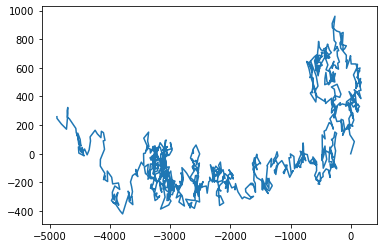

In [12]:
import matplotlib.pyplot as plt
plt.plot(traj_test[0][0], traj_test[0][1])

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import sympy as spy

def generate_potential_2d_spirals_numeric(IN_n_states,IN_number_of_branches,flag_visualize):
    """
    The spiral surface is a modification of the Anormal distribution, which is
    a kind of generalization of the multivariate normal distribution

    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])

    # Hyper Parameters
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1

    # Instantiation
    potential_numeric = np.zeros(IN_n_states)

    # Run
    n_petals = IN_number_of_branches
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            # Transform coordinates from (x,y) to (angle,Distance)
            angle = np.arctan2(x[x_id], y[y_id])
            distance_squared = x[x_id]**2 + y[y_id]**2;  # BIG MODIFICATION
            
            # Use the chosen shape function
            r = (np.sin((angle+warping_coeff*distance_squared)*n_petals)*sinus_to_distance_coeff*distance_squared+2)

            # Apply the formula
            potential_numeric[x_id,y_id] = -1*np.exp( -1/2*(1)/(sigma*r)**2)*(1+decrease_coeff*distance_squared)

    potential_numeric = potential_numeric - np.min(potential_numeric[:]) # Shift so that minimum=0
    #potential_numeric = potential_numeric/np.sum(potential_numeric[:]) # Normalize at the end because used non-normalized shape function r.

    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return x, y, potential_numeric


def generate_potential_2d_spirals_symbolic(IN_n_states,IN_number_of_branches,flag_visualize, flag_puresymbolic=False):
    # Sympy

    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])

    # Hyper Parameters
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1

    # Instantiation
    potential_symbolic_value = np.zeros(IN_n_states)
    n_petals = IN_number_of_branches

    #--Symbolic Version of the potential--#
    # Requires Sympy

    # Symbolic variables for symbolic expression of the potential
    x_symb, y_symb = spy.symbols('x_symb, y_symb', real=True)

    # Transform coordinates from (x, y) to (angle, Distance)
    angle_symb = spy.atan2(x_symb, y_symb)
    distance_squared_symb = x_symb ** 2 + y_symb ** 2

    # Use the chosen shape function
    r_symb = (spy.sin((angle_symb + warping_coeff * distance_squared_symb) * n_petals) * sinus_to_distance_coeff * distance_squared_symb + 2)

    # Apply the formula
    # Const to multi
    mul = -1000
    potential_symbolic = mul*spy.exp( -1/2*(1)/(sigma*r_symb)**2)*(1+decrease_coeff*distance_squared_symb)

    # Symbolic derivatives with respect to x and y
    dpotsym_dx = potential_symbolic.diff(x_symb)
    dpotsym_dy = potential_symbolic.diff(y_symb)
    if flag_puresymbolic:
        return potential_symbolic, dpotsym_dx, dpotsym_dy
    # Compute the expression over our discrete set of bins for checking purposes
    # x = np.linspace(x_min, x_max, IN_n_states[0])
    # y = np.linspace(y_min, y_max, IN_n_states[1])

    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):
            potential_symbolic_value[x_id, y_id] = potential_symbolic.evalf(subs={x_symb:x[x_id], y_symb:y[y_id]})
            # worker <- paralleled 

    potential_symbolic_value = potential_symbolic_value - np.min(potential_symbolic_value[:]) # Shift so that minimum=0
    #potential_symbolic_value = potential_symbolic_value/np.sum(potential_symbolic_value[:]) # Normalize at the end because used non-normalized shape function r.
    
    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_symbolic_value
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)

    return x, y, potential_symbolic_value, potential_symbolic


In [20]:
%matplotlib qt
generate_potential_2d_spirals_numeric(IN_n_states=[100,100],IN_number_of_branches=2,flag_visualize=True)

100%|██████████| 100/100 [00:00<00:00, 1308.81it/s]


(array([[-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        ...,
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ]]),
 array([[-20.        , -20.        , -20.        , ..., -20.        ,
         -20.        , -20.        ],
        [-19.5959596 , -19.5959596 , -19.5959596 , ..., -19.5959596 ,
         -19.5959596 , -19.5959596 ],
        [-19.19191919, -19.19191919, -19.19191919, ..., -19.19191919,
         -19.19191919, -19.19191919],
        ...,


In [24]:
spy.simplify(dx)

-(0.1*x_symb*(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**3 + (0.2*x_symb*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + (0.004*x_symb*(x_symb**2 + y_symb**2) + 0.2*y_symb)*cos(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)))*(0.0510204081632653*x_symb**2 + 0.0510204081632653*y_symb**2 + 1.02040816326531))*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**3

In [26]:
spy.simplify(dy)

-(0.1*y_symb*(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**3 + (0.2*y_symb*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) - (0.2*x_symb - 0.004*y_symb*(x_symb**2 + y_symb**2))*cos(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)))*(0.0510204081632653*x_symb**2 + 0.0510204081632653*y_symb**2 + 1.02040816326531))*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**3

In [29]:
import sys
sys.path.append('../')
import multiprocessing as mp
import math
import datetime
import generate_potential_2d_spiral as gp2Sp
import generate_potential_2d_Zshape as gp2Zs
import generate_trajectory_Langevin_2D_from_symbolic as gt2La
import sympy as spy

start_t = datetime.datetime.now()
potential_spiral, _, _ = gp2Sp.generate_potential_2d_spirals_symbolic(IN_n_states=[100,100],IN_number_of_branches=1,flag_visualize=False, flag_puresymbolic=True)
traj, _, _ = gt2La.generate_trajectory_Langevin_from_symbolic_2D(potential_symbolic=potential_spiral,position_initial=[0.01,0.01], friction=10,simul_lagtime=0.1,n_steps=10000)
end_t = datetime.datetime.now()
elapsed_sec = (end_t - start_t).total_seconds()
print("单线程计算 共消耗: " + "{:.2f}".format(elapsed_sec) + " 秒")

  0%|          | 2/9999 [00:00<12:47, 13.02it/s]

{y_symb, x_symb}
{y_symb, x_symb}
part1: 0.0002510547637939453
part2: 0.0007688999176025391
part3: 0.0003230571746826172


100%|██████████| 9999/9999 [11:39<00:00, 14.30it/s]

part4: 699.1300070285797
单线程计算 共消耗: 699.14 秒


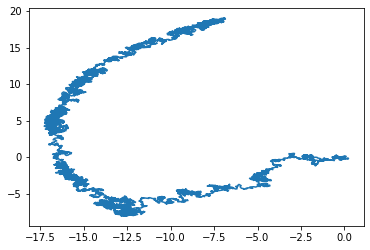

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(traj[0], traj[1])

In [33]:
traj.shape

(2, 10000)

In [35]:
print(traj)

[[ 1.00000000e-02  9.74156644e-02  6.70702679e-02 ... -7.89732439e+00
  -7.82603136e+00 -7.64522662e+00]
 [ 1.00000000e-02  7.77516029e-02  1.31052247e-01 ...  1.84387224e+01
   1.83557248e+01  1.83251725e+01]]


  2%|▏         | 2/99 [00:00<00:06, 14.32it/s]

{y_symb, x_symb}
{y_symb, x_symb}
part1: 0.0002467632293701172
part2: 0.00066375732421875
part3: 1.5735626220703125e-05


100%|██████████| 99/99 [00:06<00:00, 15.21it/s]

part4: 6.512383937835693
单线程计算 共消耗: 6.53 秒
[[ 1.00000000e-02 -6.10813920e-02 -9.32659378e-02 -9.31455146e-02
  -3.18947875e-02  2.67497780e-02  5.56282575e-02  6.39974809e-02
   1.34640295e-01  6.76947360e-02  1.23804812e-01  1.78088674e-02
  -1.36672570e-02  6.95117737e-02 -3.44542695e-02 -6.57360204e-02
   4.66092733e-05 -2.18749998e-03  1.30951335e-01  5.49800968e-02
   1.72733155e-02 -7.15750759e-02 -4.20689915e-02 -8.05531974e-02
   6.79523356e-02  1.60122821e-01  1.68529330e-01  3.66611621e-02
   7.35973201e-02  4.27711521e-02  5.40529369e-02  7.17324629e-02
  -6.50930163e-03 -2.25936679e-02 -7.49378549e-02  2.37868790e-02
  -5.72223831e-02  4.92467674e-02 -1.24085601e-01  5.72306329e-02
   4.85652093e-02  5.59120945e-02  1.60739104e-01  1.37549571e-01
   1.50267735e-01  1.02904637e-01  1.22727384e-01  1.83823546e-01
   1.88187897e-01  1.42954352e-01  1.28433469e-01 -9.80956384e-03
   8.82463353e-02  1.08540952e-01  2.51569236e-01  2.29643457e-01
   5.42315207e-02 -5.28410503e-02

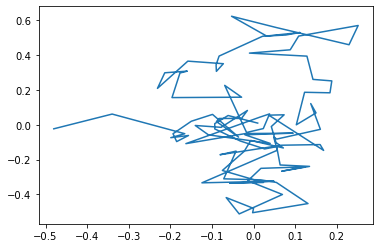

In [36]:
import sys
sys.path.append('../')
import multiprocessing as mp
import math
import datetime
import generate_potential_2d_spiral as gp2Sp
import generate_potential_2d_Zshape as gp2Zs
import generate_trajectory_Langevin_2D_from_symbolic as gt2La
import sympy as spy
import matplotlib.pyplot as plt

if __name__ == '__main__':
    start_t = datetime.datetime.now()
    potential_spiral, _, _ = gp2Sp.generate_potential_2d_spirals_symbolic(IN_n_states=[100,100],IN_number_of_branches=1,flag_visualize=False, flag_puresymbolic=True)
    traj, _, _ = gt2La.generate_trajectory_Langevin_from_symbolic_2D(potential_symbolic=potential_spiral,position_initial=[0.01,0.01], friction=10,simul_lagtime=0.1,n_steps=100)
    end_t = datetime.datetime.now()
    elapsed_sec = (end_t - start_t).total_seconds()
    print("单线程计算 共消耗: " + "{:.2f}".format(elapsed_sec) + " 秒")
    print(traj)
    plt.plot(traj[0], traj[1])
    plt.show()

  2%|▏         | 2/99 [00:00<00:06, 16.07it/s]

{y_symb, x_symb}
{y_symb, x_symb}
part1: 0.0003077983856201172
part2: 0.0008282661437988281
part3: 5.0067901611328125e-05


100%|██████████| 99/99 [00:06<00:00, 15.28it/s]


part4: 6.4821929931640625
单线程计算 共消耗: 6.49 秒
[[ 0.01        0.03029815 -0.00179504 -0.04781558  0.08183964  0.14920904
   0.1746423   0.05662999  0.05769487  0.09950418  0.02482129 -0.00498338
  -0.06229677 -0.06217775 -0.12658094 -0.18932553 -0.02972806 -0.07092774
  -0.02417714 -0.09758872 -0.1612663  -0.26017978 -0.23092174 -0.21987421
  -0.18492786 -0.19529779 -0.22310575 -0.21505931 -0.20637181 -0.2321091
  -0.32434844 -0.19145183 -0.34779376 -0.36006665 -0.34249352 -0.31668844
  -0.39286582 -0.27642379 -0.32462713 -0.30256798 -0.23109585 -0.26346749
  -0.23375355 -0.34680685 -0.31368083 -0.48688591 -0.54801809 -0.5994459
  -0.72464546 -0.76514903 -0.77566999 -0.80179541 -0.79118396 -0.81192847
  -0.87445323 -0.92467703 -0.98525939 -1.07489762 -1.01177176 -0.97934057
  -0.94490871 -0.91899322 -0.78459139 -0.73345835 -0.56137071 -0.55450861
  -0.68267634 -0.73664166 -0.72875994 -0.66629805 -0.61577966 -0.72425428
  -0.72194185 -0.61758297 -0.56926706 -0.64571838 -0.71581496 -0.69705

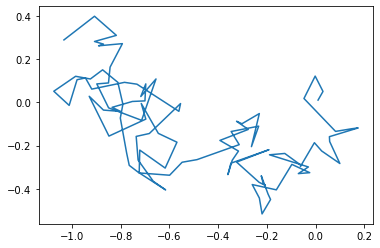

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [39]:
from test_accuracy import test_main

serial, parallel = test_main()